In [ ]:
pip install yfinance

In [2]:
# Import necesary libraries
import yfinance as yf
import numpy as np
import datetime as dt

# Download historical data for required stocks
ticker = "TATASTEEL.NS"
ohlcv = yf.download(ticker,dt.date.today()-dt.timedelta(365),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [4]:
#Indicator Functions

#Commodity Channel Index : Default Period 20
def CCI(DF, n): 
    #function calculating Commodity Channel Index, default period =20
    df = DF.copy()
    df["TP"] = (df['High'] + df['Low'] + df['Adj Close']) / 3 
    df["CCI"] = ((df["TP"] - df["TP"].rolling(n).mean()) / (0.015 * df["TP"].rolling(n).std()))
    del df["TP"]
    df["CCI_up"] = 100
    df["CCI_dn"] = -100
    return df






In [5]:
ohlcv[["CCI","CCI_up","CCi_dn"]]= CCI(ohlcv,20)[["CCI","CCI_up","CCI_dn"]]



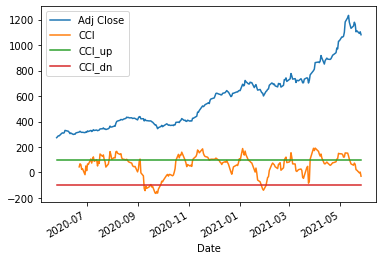

In [6]:
CCI(ohlcv,20)[:][["Adj Close", "CCI","CCI_up","CCI_dn"]].plot()

In [7]:
ohlcv

,Open,High,Low,Close,Adj Close,Volume,CCI,CCI_up,CCi_dn
Date,,,,,,,,,
2020-05-26,277.500000,284.399994,277.000000,280.450012,273.364380,12107559,NaN,100,-100
2020-05-27,282.200012,290.399994,279.049988,287.950012,280.674866,14007462,NaN,100,-100
2020-05-28,291.899994,298.600006,289.399994,295.500000,288.034119,16601958,NaN,100,-100
2020-05-29,292.100006,296.899994,287.850006,295.200012,287.741699,13127985,NaN,100,-100
2020-06-01,302.000000,317.799988,302.000000,315.200012,307.236389,24384360,NaN,100,-100
...,...,...,...,...,...,...,...,...,...
2021-05-20,1131.099976,1135.500000,1098.050049,1105.050049,1105.050049,28446253,22.204958,100,-100
2021-05-21,1114.000000,1123.900024,1105.849976,1113.099976,1113.099976,14104926,17.903959,100,-100
2021-05-24,1108.000000,1108.949951,1082.099976,1092.000000,1092.000000,18923842,-3.059250,100,-100
